# 1. Import Libraries

In [71]:
# Importing required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 2. Load the Dataset

In [74]:
# Load Boston Housing dataset
data=pd.read_csv("Boston.csv")

# Display first few rows
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 3. Exploratory Data Analysis (EDA)

In [77]:
# Check data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [79]:
# Summary statistics
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


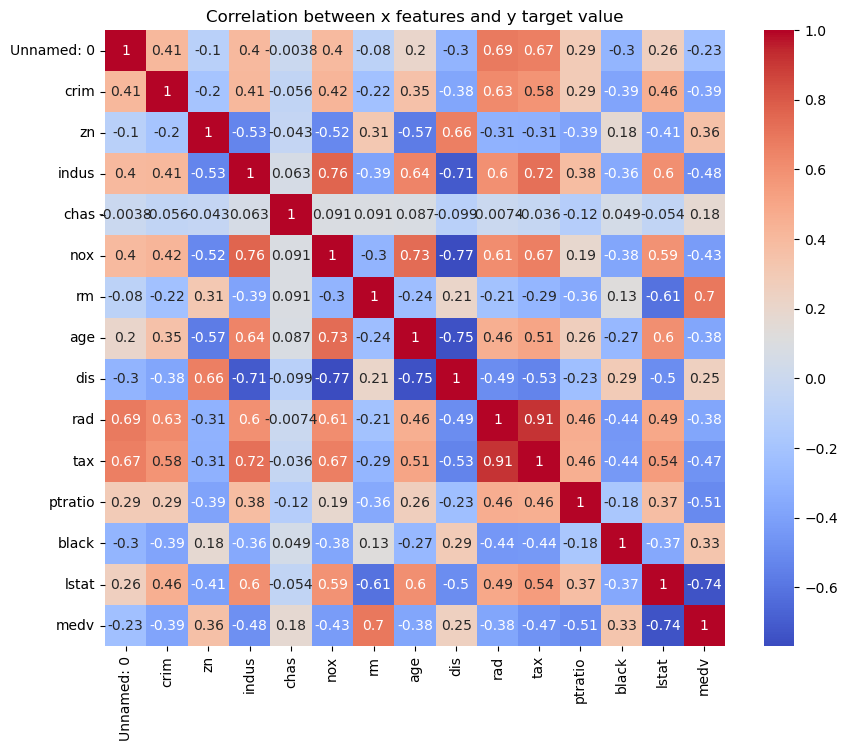

In [81]:
# Correlation matrix heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation between x features and y target value")
plt.show()

# 4. Feature vs Target Visualization

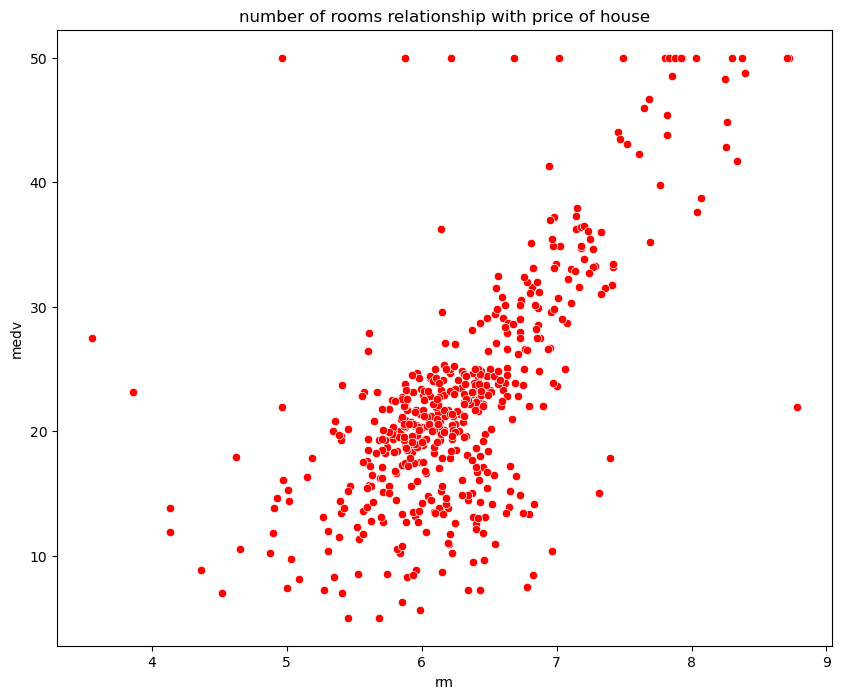

In [84]:
# Scatter plot: Number of Rooms (rm) vs House Price (medv)
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x="rm",y="medv",color="red")
plt.title("number of rooms relationship with price of house")
plt.show()


# 5. Train-Test Split

In [87]:
# Selecting features and target
x=data.drop("medv",axis=1)
y=data["medv"]

In [89]:
# Splitting the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train,y_train)
print(x_test)

     Unnamed: 0      crim    zn  indus  chas     nox     rm   age     dis  \
477         478  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   
15           16   0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986   
332         333   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407   
423         424   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   
19           20   0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965   
..          ...       ...   ...    ...   ...     ...    ...   ...     ...   
106         107   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110   
270         271   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290   
348         349   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440   
435         436  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   
102         103   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147   

     rad  tax  ptratio   black  lstat  
477   24  666     20.2  349.48  24.

# 6. Train Linear Regression Model

In [92]:
# Initialize and train the Linear Regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# 7. Make Predictions & Evaluate

In [95]:
# Predicting on test data
y_pred=model.predict(x_test)
y_pred

array([28.97335364, 35.87795794, 13.97366183, 25.61583978, 18.66608153,
       23.64466022, 17.05971239, 14.5264485 , 22.79402759, 19.60618783,
       24.62043501, 19.06428675, -6.27197735, 22.20788474, 18.64849181,
       26.15022718, 20.62835191,  5.77374284, 40.72117979, 17.48530737,
       27.08436097, 29.90818637, 11.65330429, 22.99879937, 17.85048447,
       15.5556251 , 23.31650588, 14.44013189, 22.11106256, 18.20109763,
       22.33391113, 24.79774986, 26.15304018, 17.89425941, 16.52927207,
       17.10592481, 31.77372627, 19.58243073, 23.603617  , 25.2202457 ,
       12.89702838, 31.91216634, 42.90231353, 17.74616574, 27.5000776 ,
       17.06259552, 14.39460992, 26.51167547, 20.10908837, 30.51587021,
       21.74636797, 34.09117218, 16.44234996, 26.62572161, 39.42027423,
       22.49131562, 18.75511558, 32.62323592, 25.35325167, 12.58127149,
       23.23090959, 31.15654212, 31.70938821, 16.555899  , 19.75136599,
       16.30198537, 20.60703158, 26.4253367 , 31.3483927 , 11.44

In [97]:
# Mean Absolute Error
mae=mean_absolute_error(y_pred,y_test)
mae

3.2007547573407873

# 8. Actual vs Predicted Plot

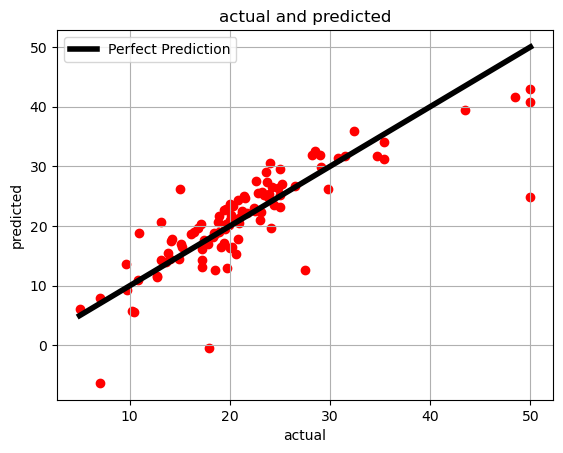

In [100]:
# Plot Actual vs Predicted values
plt.scatter(y_test,y_pred,color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black", linewidth=4, label="Perfect Prediction")
plt.title("actual and predicted")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Conclusion

- The model gives an MAE of ~3.20, meaning the average prediction error is ~$3,200.
- Most predictions are close to actual values as seen in the scatter plot.
- The model works well but may be improved with Ridge/Lasso Regression to reduce outliers.